# Import Libraries and Preview Data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier

import xgboost as xgb

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('data/clean_data.csv', index_col=0)

In [3]:
df.head()

,state,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveCasesViral,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
1,AL,3084.0,0,1174.0,0,1232975.0,3158,204857.0,173854.0,1170,84471.0,1406829.0,4138,0,4138
2,AR,2108.0,23,786.0,62,1324655.0,7716,122811.0,111761.0,945,108201.0,1436416.0,8545,0,8545
4,AZ,6164.0,0,1232.0,9,1630206.0,10142,259699.0,253001.0,435,43460.0,1883207.0,10547,10547,0
6,CO,2168.0,0,1134.0,20,1210972.0,10965,130984.0,123351.0,3017,8667.0,2245385.0,30597,13934,0
7,CT,4698.0,27,496.0,0,2498115.0,86636,81463.0,76256.0,3338,9800.0,2579578.0,89974,0,89686


In [4]:
df.describe()

,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveCasesViral,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
count,7848.000000,7848.000000,7848.000000,7848.000000,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7.848000e+03,7848.000000,7848.000000,7.848000e+03
mean,2697.690240,13.756626,619.650612,32.450943,9.101826e+05,10376.275229,75665.605759,73828.007390,715.622324,39693.192151,1.073445e+06,12592.208461,3089.970438,8.664066e+03
std,4768.100689,31.395688,1057.981393,253.344320,1.459462e+06,16721.306715,110977.252791,110163.630126,1091.398648,78266.889113,1.595635e+06,18021.230078,12569.000905,3.154100e+04
min,1.000000,0.000000,0.000000,0.000000,1.308000e+03,0.000000,141.000000,137.000000,0.000000,11.000000,1.449000e+03,0.000000,0.000000,0.000000e+00
25%,213.000000,1.000000,94.750000,0.000000,1.670785e+05,1624.750000,9248.500000,9068.750000,106.000000,3346.000000,2.130140e+05,2652.750000,0.000000,0.000000e+00
50%,829.000000,5.000000,343.000000,3.000000,4.348380e+05,4922.000000,36496.500000,35779.500000,414.000000,11395.000000,5.396815e+05,6470.500000,0.000000,2.493500e+03
75%,2967.250000,15.000000,744.250000,32.000000,1.055481e+06,11684.000000,103457.750000,99705.500000,894.000000,49750.500000,1.267424e+06,14747.500000,3427.250000,8.941000e+03
max,25973.000000,951.000000,10993.000000,16373.000000,1.524405e+07,166478.000000,963019.000000,963019.000000,17820.000000,820215.000000,1.577623e+07,168353.000000,820817.000000,2.352923e+06


# Question 3: Make a model to predict the Covid-19 daily quality 

### Use Death Increase as an estimator for the Covid-19 quality and divide into different levels

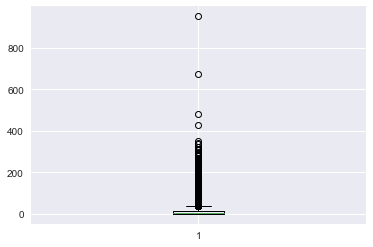

In [5]:
plt.boxplot(df['deathIncrease'])
plt.show()

In [6]:
df.corr()

,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveCasesViral,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
death,1.000000,0.319326,0.380864,0.060170,0.787644,0.745800,0.802609,0.804794,0.294694,0.445503,0.788072,0.734087,0.027438,0.154685
deathIncrease,0.319326,1.000000,0.758733,0.081788,0.189159,0.244405,0.437336,0.438577,0.541205,0.393041,0.198004,0.252440,0.017693,0.115336
hospitalizedCurrently,0.380864,0.758733,1.000000,0.087588,0.321887,0.390851,0.591433,0.592361,0.777082,0.522036,0.326386,0.394547,-0.001314,0.178803
hospitalizedIncrease,0.060170,0.081788,0.087588,1.000000,0.017374,0.027256,0.049251,0.047637,0.055023,0.002618,0.020500,0.029113,0.003202,0.008485
negative,0.787644,0.189159,0.321887,0.017374,1.000000,0.839536,0.832320,0.830648,0.452322,0.578435,0.983733,0.824563,0.000788,0.183278
negativeIncrease,0.745800,0.244405,0.390851,0.027256,0.839536,1.000000,0.728710,0.728775,0.475250,0.463629,0.814331,0.947614,0.004988,0.251340
positive,0.802609,0.437336,0.591433,0.049251,0.832320,0.728710,1.000000,0.999448,0.634182,0.829416,0.841511,0.729606,0.023758,0.215453
positiveCasesViral,0.804794,0.438577,0.592361,0.047637,0.830648,0.728775,0.999448,1.000000,0.630809,0.828023,0.839791,0.729238,0.022994,0.213297
positiveIncrease,0.294694,0.541205,0.777082,0.055023,0.452322,0.475250,0.634182,0.630809,1.000000,0.643955,0.472062,0.515793,0.056234,0.234114
recovered,0.445503,0.393041,0.522036,0.002618,0.578435,0.463629,0.829416,0.828023,0.643955,1.000000,0.599123,0.489932,0.035674,0.256901


In [7]:
df.reset_index(inplace=True)
df.head()

,index,state,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveCasesViral,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
0,1,AL,3084.0,0,1174.0,0,1232975.0,3158,204857.0,173854.0,1170,84471.0,1406829.0,4138,0,4138
1,2,AR,2108.0,23,786.0,62,1324655.0,7716,122811.0,111761.0,945,108201.0,1436416.0,8545,0,8545
2,4,AZ,6164.0,0,1232.0,9,1630206.0,10142,259699.0,253001.0,435,43460.0,1883207.0,10547,10547,0
3,6,CO,2168.0,0,1134.0,20,1210972.0,10965,130984.0,123351.0,3017,8667.0,2245385.0,30597,13934,0
4,7,CT,4698.0,27,496.0,0,2498115.0,86636,81463.0,76256.0,3338,9800.0,2579578.0,89974,0,89686


In [8]:
# Set deathIncrease into a categorial column(A:0-10, B:10-20, C:20-50, D:50-inf)
for idx,i in enumerate(df['deathIncrease']):
    if i>=0 and i<=10:
        df['deathIncrease'][idx] = 'A'
    elif i>10 and i<=20:
        df['deathIncrease'][idx] = 'B'
    elif i>20 and i<=50:
        df['deathIncrease'][idx] = 'C'
    elif i>50:
        df['deathIncrease'][idx] = 'D'

In [9]:
df.drop(columns='index', inplace=True)

In [10]:
df['deathIncrease'].value_counts()

A    5244
B    1216
C    1027
D     361
Name: deathIncrease, dtype: int64

In [11]:
df.rename(columns={'deathIncrease': 'grade'},inplace=True)

In [12]:
df_cont = df.drop(columns=['grade', 'state'])
state_dummies = pd.get_dummies(df['state'], prefix='state', drop_first=True)
df_final = pd.concat([df['grade'], df_cont, state_dummies], axis=1)

# Split dataset

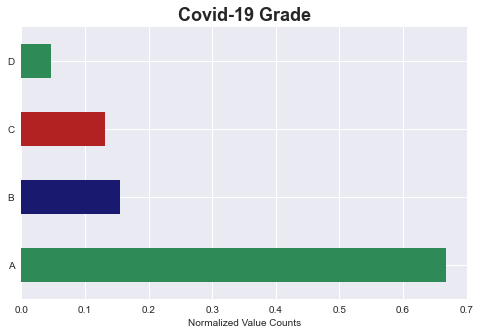

In [13]:
# Bar Graph of the normalized value counts for grade
df['grade'].value_counts(normalize=True).plot(kind='barh', figsize=(8,5), color=['seagreen','midnightblue','firebrick'])
plt.title("Covid-19 Grade", fontweight='bold', fontsize=18)
plt.xlabel('Normalized Value Counts',fontsize=10)
plt.show()

In [14]:
# Define X and y
y = df_final['grade']
X = df_final.drop(columns=['grade'])

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train_test, X_validation, y_train_test, y_validation = train_test_split(X, y, test_size=0.1, random_state=17)
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.2, random_state=17)
print(y_train.value_counts())
print(y_test.value_counts())
print(y_validation.value_counts())

A    3806
B     860
C     730
D     254
Name: grade, dtype: int64
A    905
B    233
C    198
D     77
Name: grade, dtype: int64
A    533
B    123
C     99
D     30
Name: grade, dtype: int64


# Feature Transformation

In [15]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_validation = pd.DataFrame(scaler.fit_transform(X_validation))

# Feature Selection

In [16]:
# Vif function to get a list of high vif features
def vif_over(X, value):
    vif_list = []
    X = add_constant(X)
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    for i in list(zip(X, vif)):
        if i[1] > value:
            vif_list.append(i)
    return vif_list

In [17]:
# A while loop function thta drop the highest vif each time until all vif in the range we set except intercept
def drop_high_vif(X, value, y):
    while (len(vif_over(X, value)) > 1):
        vif_list = vif_over(X, value)
        if vif_list[0][0] == 'const':
            vif_list.pop(0)
        drop = vif_list[0]
        for n in vif_list:
            if n[1] > drop[1]:
                drop = n
        X.drop(columns=[drop[0]], inplace=True)

In [18]:
drop_high_vif(X_train, 3, 'grade')

In [19]:
X_test = X_test[X_train.columns]
X_validation = X_validation[X_train.columns]

In [20]:
# Univariate Selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_validation, y_validation)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Columns      Score
1   hospitalizedCurrently  44.252523
2    hospitalizedIncrease  43.987123
7        positiveIncrease  40.343261
16               state_CO  35.773368
31               state_MT  26.234656
40               state_OH  22.988206
17               state_CT  22.257920
24               state_LA  18.707430
35               state_NH  15.948597
33               state_ND  15.570166


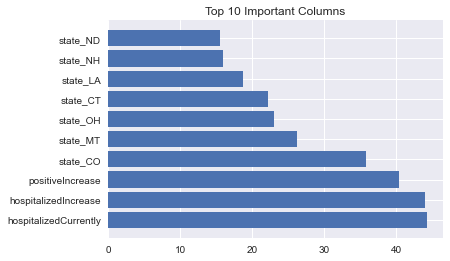

In [21]:
featureScores.sort_values(by=['Score'], ascending=False, inplace=True)
plt.title('Top 10 Important Columns')
plt.barh(width=featureScores['Score'][:10], y=featureScores['Columns'][:10])
plt.show()

# Modeling
Logistic Regression/ random forest / XGBoost

In [22]:
# A run_model function for making models using accuracy for evaluation
def run_model(model, X_train, X_test, y_train, y_test, X_validation, y_validation):
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"Training Accuracy:   {(train_accuracy * 100):.4}%")
    y_pred_test = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy:       {(test_accuracy * 100):.4}%")
    y_pred_validation = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_pred_validation)
    print(f"Validation Accuracy: {(validation_accuracy * 100):.4}%")

### Logistic Regression

In [23]:
# Instantiate the LogisticRegression for GridsearchCV
logre = LogisticRegression(penalty='l1', tol=0.01)

In [24]:
# Parameter Tuning
# Create a Grid for GridsearchCV to find the best parameters for the classifier
rf_param_grid = {'C':[1, 0.1, 1.0],  'class_weight':[None, 'balanced'], 'solver':['saga','newton-cg']}

gs_tree = GridSearchCV(logre, rf_param_grid, cv=3)

gs_tree.fit(X_validation, y_validation)
print(gs_tree.best_params_)

{'C': 1.0, 'class_weight': None, 'solver': 'saga'}


In [25]:
# Apply the best_params to the model
logre = LogisticRegression(C=1, penalty='l1', tol=0.01, solver='saga')
logre.fit(X_train, y_train)
run_model(logre, X_train, X_test, y_train, y_test, X_validation, y_validation)

Training Accuracy:   71.86%
Test Accuracy:       68.58%
Validation Accuracy: 72.23%


### Random Forest

In [26]:
# Instantiate the RandomForestClassifier for GridsearchCV
forest = RandomForestClassifier()

In [27]:
# Parameter Tuning
# Create a Grid for GridsearchCV to find the best parameters for the classifier
rf_param_grid = {'n_estimators': [100,250,500],
                'criterion': ['gini', 'mse'],
                'max_depth': [None, 2],
                'min_samples_split': [2, 5, 8],
                'min_samples_leaf': [2, 5, 8],
                'max_features':np.arange(5,10)}

gs_tree = GridSearchCV(forest, rf_param_grid, cv=3)

gs_tree.fit(X_validation, y_validation)
print(gs_tree.best_params_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
# Apply the best_params to the model
forest = RandomForestClassifier(n_estimators=100, criterion='gini', 
                                max_depth=None, min_samples_split=2, 
                                min_samples_leaf=2, max_features=8, random_state=17)
forest.fit(X_train, y_train)
run_model(forest, X_train, X_test, y_train, y_test, X_validation, y_validation)

Training Accuracy:   93.47%
Test Accuracy:       72.68%
Validation Accuracy: 70.7%


### XGBoost

In [29]:
# Instantiate the XGBoost Classifier for GridsearchCV
xgboost = xgb.XGBClassifier()

In [30]:
# Parameter Tuning
# Create a Grid for GridsearchCV to find the best parameters for the classifier
xg_param_grid = {'n_estimators': [100, 250, 500],
              'learning_rate': [0.05, 0.1, 0.15], 
              'max_depth': [5, 6, 7, 8],
              'colsample_bytree': [0.7, 1],
              'gamma': [0.0, 0.1]}

xg_search = GridSearchCV(xgboost, xg_param_grid, scoring='accuracy', cv=3)

xg_search.fit(X_validation, y_validation)

print(xg_search.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}


In [31]:
# Apply the best_params to the model
booster = xgb.XGBClassifier(learning_rate=0.05, max_depth=8, n_estimators=100,
                            colsample_bytree=0.7, gamma=0.0, random_state=17)
booster.fit(X_train, y_train)
run_model(booster, X_train, X_test, y_train, y_test, X_validation, y_validation)

Training Accuracy:   84.99%
Test Accuracy:       71.05%
Validation Accuracy: 69.68%


# Dealing with Class Imbalance
There is class imbalance in our target. By balancing the data, we can remove the bias caused by this class imbalance. The data will be resampled using SMOTE.

In [32]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

In [33]:
# Compare previous and resampled target counts
# Print imbalanced target
print(df['grade'].value_counts())

# SMOTE to balance the data
X_SMOTE, y_SMOTE = SMOTE().fit_sample(X_train, y_train)

# Print balanced target
print(pd.Series(y_SMOTE).value_counts())

A    5244
B    1216
C    1027
D     361
Name: grade, dtype: int64
D    3806
A    3806
B    3806
C    3806
Name: grade, dtype: int64


In [34]:
# Train test split the SMOTE data
X_train_test2, X_validation2, y_train_test2, y_validation2 = train_test_split(X_SMOTE, y_SMOTE, test_size=0.1, random_state=17)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_test2, y_train_test2, test_size=0.2, random_state=17)
print(y_train2.value_counts())
print(y_test2.value_counts())
print(y_validation2.value_counts())

B    2763
D    2754
C    2722
A    2721
Name: grade, dtype: int64
C    709
A    695
D    669
B    668
Name: grade, dtype: int64
A    390
D    383
B    375
C    375
Name: grade, dtype: int64


In [35]:
X_train2 = pd.DataFrame(scaler.fit_transform(X_train2))
X_test2 = pd.DataFrame(scaler.fit_transform(X_test2))
X_validation2 = pd.DataFrame(scaler.fit_transform(X_validation2))

### Logistic Regression (SMOTE):

In [36]:
# Parameter Tuning
# Create a Grid for GridsearchCV to find the best parameters for the classifier
rf_param_grid = {'C':[1, 0.1, 1.0],  'class_weight':[None, 'balanced'], 'solver':['saga','newton-cg']}

gs_tree = GridSearchCV(logre, rf_param_grid, cv=3)

gs_tree.fit(X_validation2, y_validation2)
print(gs_tree.best_params_)

{'C': 1, 'class_weight': 'balanced', 'solver': 'saga'}


In [37]:
# Apply the best_params to the model
logre2 = LogisticRegression(C=1, penalty='l1', class_weight='balanced', tol=0.01, solver='saga')
logre2.fit(X_train2, y_train2)
run_model(logre2, X_train2, X_test2, y_train2, y_test2, X_validation2, y_validation2)

Training Accuracy:   62.32%
Test Accuracy:       62.75%
Validation Accuracy: 60.93%


### Random Forest (SMOTE):

In [38]:
# Parameter Tuning
# Create a Grid for GridsearchCV to find the best parameters for the classifier
rf_param_grid = {'n_estimators': [100,250,500],
                'criterion': ['gini', 'mse'],
                'max_depth': [None, 2],
                'min_samples_split': [2, 5, 8],
                'min_samples_leaf': [2,5, 8],
                'max_features':np.arange(5,10)}

gs_tree = GridSearchCV(forest, rf_param_grid, cv=3)

gs_tree.fit(X_validation2, y_validation2)
print(gs_tree.best_params_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [39]:
# Apply the best_params to the model
forest2 = RandomForestClassifier(n_estimators=500, criterion='gini', 
                                max_depth=None, min_samples_split=5, 
                                min_samples_leaf=2, max_features=6, random_state=17)
forest2.fit(X_train2, y_train2)
run_model(forest2, X_train2, X_test2, y_train2, y_test2, X_validation2, y_validation2)

Training Accuracy:   96.27%
Test Accuracy:       76.47%
Validation Accuracy: 71.63%


### XGBoost (SMOTE):

In [40]:
# Parameter Tuning
# Create a Grid for GridsearchCV to find the best parameters for the classifier
xg_param_grid = {'n_estimators': [100, 250, 500],
              'learning_rate': [0.05, 0.1, 0.15], 
              'max_depth': [5, 6, 7, 8],
              'colsample_bytree': [0.7, 1],
              'gamma': [0.0, 0.1]}

xg_search = GridSearchCV(xgboost, xg_param_grid, scoring='accuracy', cv=6)

xg_search.fit(X_validation2, y_validation2)

print(xg_search.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 250}


In [41]:
# Apply the best_params to the model
booster2 = xgb.XGBClassifier(learning_rate=0.05, max_depth=8, n_estimators=250,
                            colsample_bytree=0.7, gamma=0.1, random_state=17)
booster2.fit(X_train2, y_train2)
run_model(booster2, X_train2, X_test2, y_train2, y_test2, X_validation2, y_validation2)

Training Accuracy:   93.68%
Test Accuracy:       72.82%
Validation Accuracy: 68.68%


# Choose Model
By comparing, I will choose Random Forest(SMOTE) model as my final model

### Cost Benefit

In [42]:
def cost_benefit_analysis(model, X_test, y_test):
    y_preds = model.predict(X_test)
    label_dict = {"TP":0, "FP": 0, "TN": 0, "FN": 0}
    for yt, yp in zip(y_test, y_preds):
        if yt==yp:
            if yt==1:
                label_dict["TP"] += 1
            else:
                label_dict["TN"] += 1
        else:
            if yp==1:
                label_dict["FP"] += 1
            else:
                label_dict["FN"] += 1
    cb_dict = {"TP": 50, "FP": -10, "TN": 0, "FN": -60}
    total = 0
    for key in label_dict.keys():
        total += cb_dict[key]*label_dict[key]
    return total / sum(label_dict.values())

In [43]:
cost_benefit_analysis(logre, X_test, y_test)

-18.853503184713375

### Confusion Matrix and Classification Report

In [44]:
y_preds = logre.predict(X_test)
print(confusion_matrix(y_preds, y_test))

[[785 112  50   7]
 [ 29  28  20   3]
 [ 83  86 115  26]
 [  8   7  13  41]]


In [45]:
run_model(logre, X_train, X_test, y_train, y_test, X_validation, y_validation)

Training Accuracy:   71.86%
Test Accuracy:       68.58%
Validation Accuracy: 72.23%
